In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    auc,
    brier_score_loss,
    log_loss
)
from sklearn.calibration import calibration_curve



In [26]:
def get_overround(odds):
    implied_probs = [1/odd for odd in odds]
    overround = np.sum(implied_probs)

    return overround.item()

get_overround([1.263,6.06,9.36])

1.06361974585911

In [69]:
btb = pd.read_excel('data/btb/btbs_data_his.xlsx')
probs = 1/btb.filter(regex='odds')
probs.columns = [x.replace('odds','implied_prob') for x in probs]
btb = pd.concat([btb,probs],axis=1)

btb['home_win']=np.where(btb['home_goals']>btb['away_goals'],1,0)
btb['bet365_1x2_overround']=btb['bet365_home_implied_prob'] + btb['bet365_draw_implied_prob'] + btb['bet365_away_implied_prob'] 
btb['bet365_home_actual_prob'] = btb['bet365_home_implied_prob']/btb['bet365_1x2_overround']
btb['bet365_away_actual_prob'] = btb['bet365_away_implied_prob']/btb['bet365_1x2_overround']
btb['bet365_draw_actual_prob'] = btb['bet365_draw_implied_prob']/btb['bet365_1x2_overround']

btb = btb[btb['division'].isin(['Championship','La Liga','Premier League','Serie A','Ligue 1','Bundesliga','Eredivisie'])]

btb.dropna(subset=['bet365_home_odds'],inplace=True)
btb.filter(regex='bet365')

,bet365_home_odds,bet365_draw_odds,bet365_away_odds,bet365_u25_odds,bet365_o25_odds,bet365_home_implied_prob,bet365_draw_implied_prob,bet365_away_implied_prob,bet365_u25_implied_prob,bet365_o25_implied_prob,bet365_1x2_overround,bet365_home_actual_prob,bet365_away_actual_prob,bet365_draw_actual_prob
7075,1.25,6.00,10.00,NaN,NaN,0.800000,0.166667,0.100000,NaN,NaN,1.066667,0.750000,0.093750,0.156250
7076,2.00,3.50,3.60,NaN,NaN,0.500000,0.285714,0.277778,NaN,NaN,1.063492,0.470149,0.261194,0.268657
7077,1.91,3.60,3.80,NaN,NaN,0.523560,0.277778,0.263158,NaN,NaN,1.064496,0.491839,0.247214,0.260948
7078,1.57,4.33,5.00,NaN,NaN,0.636943,0.230947,0.200000,NaN,NaN,1.067890,0.596450,0.187285,0.216265
7079,2.05,3.40,3.60,NaN,NaN,0.487805,0.294118,0.277778,NaN,NaN,1.059700,0.460323,0.262129,0.277548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45710,5.75,4.33,1.53,1.98,1.88,0.173913,0.230947,0.653595,0.505051,0.531915,1.058455,0.164308,0.617499,0.218193
45711,1.95,3.20,4.33,1.57,2.38,0.512821,0.312500,0.230947,0.636943,0.420168,1.056267,0.485503,0.218644,0.295853
45712,3.70,3.60,2.00,1.88,1.98,0.270270,0.277778,0.500000,0.531915,0.505051,1.048048,0.257880,0.477077,0.265043
45713,1.53,3.70,7.50,2.03,1.83,0.653595,0.270270,0.133333,0.492611,0.546448,1.057198,0.618233,0.126120,0.255648


In [78]:
btb

,Unnamed: 0,division_id,division,season_id,season,match_date,match_teams,home_team_id,home_team,away_team_id,...,bet365_draw_implied_prob,bet365_away_implied_prob,bet365_u25_implied_prob,bet365_o25_implied_prob,home_win,bet365_1x2_overround,bet365_home_actual_prob,bet365_away_actual_prob,bet365_draw_actual_prob,error
7075,7075,dff80cb4edd4a90c83a23346b5b9bef0,Bundesliga,ce5e692cf4c985fd7069a454eb76ff87,2014_2015,2014-08-22,Bayern Munich - Wolfsburg,240dd2121e44ac29e6be1288636e6a10,Bayern Munich,27df841945171e9ee8acc001f3857a5f,...,0.166667,0.100000,NaN,NaN,1,1.066667,0.750000,0.093750,0.156250,0.040000
7076,7076,dff80cb4edd4a90c83a23346b5b9bef0,Bundesliga,ce5e692cf4c985fd7069a454eb76ff87,2014_2015,2014-08-23,FC Koln - Hamburg,c0c98cf0eadd6be0c20f97e69b1f6863,FC Koln,35d7df6ed3d93be2927d14acc5f1fc9a,...,0.285714,0.277778,NaN,NaN,0,1.063492,0.470149,0.261194,0.268657,0.250000
7077,7077,dff80cb4edd4a90c83a23346b5b9bef0,Bundesliga,ce5e692cf4c985fd7069a454eb76ff87,2014_2015,2014-08-23,Hoffenheim - Augsburg,525ac5580921f59022131a5d0430ea09,Hoffenheim,21dba34d74f8b1cb8d42e34579c40946,...,0.277778,0.263158,NaN,NaN,1,1.064496,0.491839,0.247214,0.260948,0.226995
7078,7078,dff80cb4edd4a90c83a23346b5b9bef0,Bundesliga,ce5e692cf4c985fd7069a454eb76ff87,2014_2015,2014-08-23,Dortmund - Leverkusen,2728451089b9149bad7b106a792e51f9,Dortmund,31f296e354f2693c68d01f1570ca3df1,...,0.230947,0.200000,NaN,NaN,0,1.067890,0.596450,0.187285,0.216265,0.405696
7079,7079,dff80cb4edd4a90c83a23346b5b9bef0,Bundesliga,ce5e692cf4c985fd7069a454eb76ff87,2014_2015,2014-08-23,Ein Frankfurt - Freiburg,27e4c7e9967dd8103e2769397b01abb3,Ein Frankfurt,4954c53c759af8001d314f00bf3577f3,...,0.294118,0.277778,NaN,NaN,1,1.059700,0.460323,0.262129,0.277548,0.262344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45710,45710,ebbe640962da284afb5ba2255e9f83f1,Serie A,3ac445d3cc1d404987efdfcfa42f3bcd,2024_2025,2025-05-25,Venezia - Juventus,0fb35c9b5b18cbaa45b8511a7f84a2c0,Venezia,fdb4b66db0972a3b17e5d5b1ffbe4945,...,0.230947,0.653595,0.505051,0.531915,0,1.058455,0.164308,0.617499,0.218193,0.030246
45711,45711,ebbe640962da284afb5ba2255e9f83f1,Serie A,3ac445d3cc1d404987efdfcfa42f3bcd,2024_2025,2025-05-25,Empoli - Verona,0344ab6bc91d676637daf6609a0aa810,Empoli,d32a635cff5dcc73a609d313801541d4,...,0.312500,0.230947,0.636943,0.420168,0,1.056267,0.485503,0.218644,0.295853,0.262985
45712,45712,ebbe640962da284afb5ba2255e9f83f1,Serie A,3ac445d3cc1d404987efdfcfa42f3bcd,2024_2025,2025-05-25,Udinese - Fiorentina,8daf8539f8ed1362b88ecff8d9a7c76e,Udinese,9682b2bd8ad3c6be09fd0cc8fa19a667,...,0.277778,0.500000,0.531915,0.505051,0,1.048048,0.257880,0.477077,0.265043,0.073046
45713,45713,ebbe640962da284afb5ba2255e9f83f1,Serie A,3ac445d3cc1d404987efdfcfa42f3bcd,2024_2025,2025-05-25,Lazio - Lecce,84d0447bddc00597d2a14284d627c8ed,Lazio,7ca34728aa88c9eb0e9b936fd7fdfa2e,...,0.270270,0.133333,0.492611,0.546448,0,1.057198,0.618233,0.126120,0.255648,0.427186


In [79]:
btb.groupby(['season','division']).count()

Unnamed: 0  division_id  season_id  match_date  \
season    division                                                         
2014_2015 Bundesliga             306          306        306         306   
          La Liga                380          380        380         380   
          Ligue 1                380          380        380         380   
          Premier League         380          380        380         380   
          Serie A                380          380        380         380   
...                              ...          ...        ...         ...   
2024_2025 Eredivisie             306          306        306         306   
          La Liga                380          380        380         380   
          Ligue 1                306          306        306         306   
          Premier League         380          380        380         380   
          Serie A                380          380        380         380   

                          match_teams  home_team_id  home_team  away_team_id  \
season    division                                                             
2014_2015 Bundesliga              306           306        306           306   
          La Liga                 380           380        380           380   
          Ligue 1                 380           380        380           380   
          Premier League          380           380        380           380   
          Serie A                 380           380        380           380   
...                               ...           ...        ...           ...   
2024_2025 Eredivisie              306           306        306           306   
          La Liga                 380           380        380           380   
          Ligue 1                 306           306        306           306   
          Premier League          380           380        380           380   
          Serie A                 380           380        380           380   

                          away_team  home_num_players  ...  \
season    division                                     ...   
2014_2015 Bundesliga            306               306  ...   
          La Liga               380               380  ...   
          Ligue 1               380               380  ...   
          Premier League        380               380  ...   
          Serie A               380               380  ...   
...                             ...               ...  ...   
2024_2025 Eredivisie            306               306  ...   
          La Liga               380               380  ...   
          Ligue 1               306               306  ...   
          Premier League        380               380  ...   
          Serie A               380               380  ...   

                          bet365_draw_implied_prob  bet365_away_implied_prob  \
season    division                                                             
2014_2015 Bundesliga                           306                       306   
          La Liga                              380                       380   
          Ligue 1                              380                       380   
          Premier League                       380                       380   
          Serie A                              380                       380   
...                                            ...                       ...   
2024_2025 Eredivisie                           306                       306   
          La Liga                              380                       380   
          Ligue 1                              306                       306   
          Premier League                       380                       380   
          Serie A                              380                       380   

                          bet365_u25_implied_prob  bet365_o25_implied_prob  \
season    division                                                    

<Axes: ylabel='Frequency'>

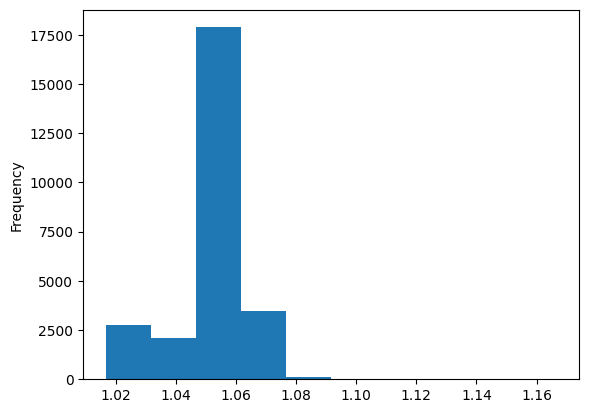

In [70]:
btb['bet365_1x2_overround'].plot.hist()

<Axes: ylabel='Frequency'>

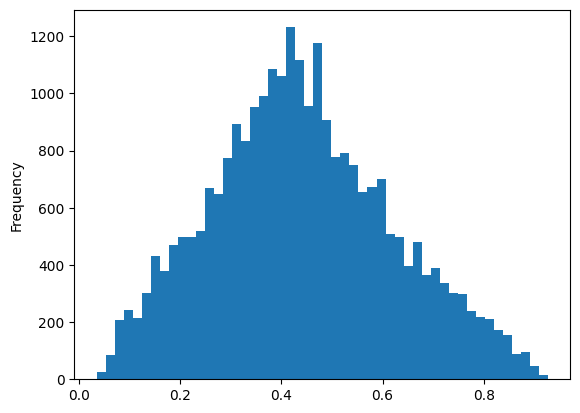

In [71]:
btb['bet365_home_actual_prob'].plot.hist(bins=50)

In [77]:
brier_score_loss(btb['home_win'],btb['bet365_home_implied_prob'])

brier_score_loss(btb['home_win'],np.where(btb['home_win']==0,0.05,0.95))

np.float64(0.0025000000000000022)

In [73]:
btb['error']=np.power(btb['home_win']-btb['bet365_home_implied_prob'],2)

<Axes: xlabel='season'>

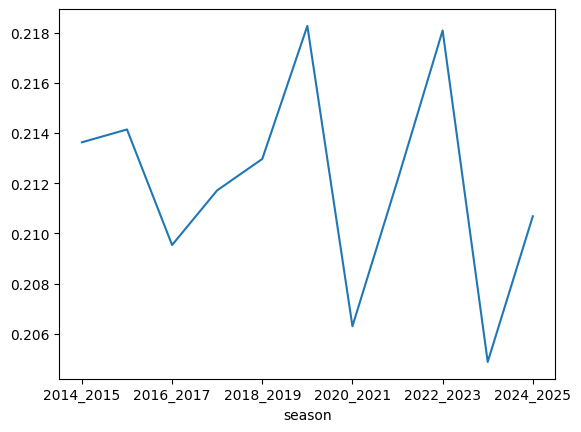

In [76]:
btb.groupby('season')['error'].mean().plot()

In [75]:
btb['error'].mean()

np.float64(0.21197685291472332)

In [144]:
football_data_odds = pd.read_csv('data/football_data/prem_2425.csv')
football_data_odds['home_win']=np.where(football_data_odds['FTHG']>football_data_odds['FTAG'],1,0)

def create_implied_prob_from_odds(df,odds_columns):
    implied_probs_df = 1/df[odds_columns]
    implied_odds_column_names = [f'{x}_implied_prob' for x in odds_columns]
    implied_probs_df.columns = implied_odds_column_names

    return implied_probs_df

def get_overround(df,implied_probability_columns):
    return df[implied_probability_columns].sum()

def prepreocess_odds(df,book_name,market_name='1X2'):
    df_copy = df.copy()

    # get implied probability columns
    implied_probs_df = create_implied_prob_from_odds(df,[f'{book_name}H',f'{book_name}D',f'{book_name}A'])
    df_copy[f'{book_name}_{market_name}_overround']=implied_probs_df.sum(axis=1)
    stripped_probs_df = implied_probs_df.div(df_copy[f'{book_name}_{market_name}_overround'],axis=0)
    stripped_probs_df.columns = [x.replace('implied','stripped') for x in stripped_probs_df.columns]

    df_copy = pd.concat([df_copy,implied_probs_df,stripped_probs_df],axis=1)

    return df_copy

football_data_odds = prepreocess_odds(football_data_odds,book_name='PS')
football_data_odds = prepreocess_odds(football_data_odds,book_name='PSC')
football_data_odds = prepreocess_odds(football_data_odds,book_name='BFE')
football_data_odds = prepreocess_odds(football_data_odds,book_name='BFEC')

In [136]:
football_data_odds['squared_error']=np.power(football_data_odds['home_win']-football_data_odds['PSCH_stripped_prob'],2)
football_data_odds['absolute_error']=np.abs(football_data_odds['home_win']-football_data_odds['PSCH_stripped_prob'])


In [ ]:
def evaluate_model(y_true,y_pred_proba,threshold=0.5):
# --- 5. Evaluate Model Performance: Metrics ---

    print("\n--- Performance Metrics on Test Set ---")

    brier_score_loss_metric = brier_score_loss(y_true,y_pred_proba)
    log_loss_metric = log_loss(y_true,y_pred_proba)

    print(f'brier_score_loss: {brier_score_loss_metric}')
    print(f'log_loss: {log_loss_metric}')

    threshold = y_true.mean()
    pred_labels = np.where(y_pred_proba>threshold,1,0)

    # Accuracy
    accuracy = accuracy_score(y_true, pred_labels)
    print(f"Accuracy: {accuracy:.4f}")

    # Classification Report (Precision, Recall, F1-Score)
    print("\nClassification Report:")
    print(classification_report(y_true, pred_labels, target_names=['Class 0', 'Class 1']))

    # Confusion Matrix
    cm = confusion_matrix(y_true, pred_labels)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title('Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    # ROC Curve and AUC Score
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Chance (AUC = 0.50)')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()


    # --- 6. Evaluate Model Performance: Calibration Plots ---

    print("\n--- Assessing Model Calibration ---")

    # 6a. Reliability Diagram (Calibration Curve)
    # This plot shows how well the predicted probabilities match the actual outcomes.
    fraction_of_positives, mean_predicted_value = calibration_curve(y_true, y_pred_proba, n_bins=10)

    plt.figure(figsize=(8, 8))
    plt.plot(mean_predicted_value, fraction_of_positives, "s-", label="Logistic Regression")
    plt.plot([0, 1], [0, 1], "k:", label="Perfectly Calibrated")
    plt.xlabel("Mean Predicted Probability (per bin)")
    plt.ylabel("Fraction of Positives (per bin)")
    plt.title("Calibration Plot (Reliability Diagram)")
    plt.legend()
    plt.show()

    # 6b. Histogram of Predicted Probabilities
    # This shows the distribution of the model's confidence.
    plt.figure(figsize=(10, 6))
    sns.histplot(y_pred_proba, kde=True, bins=30)
    plt.xlabel("Predicted Probability of being Class 1")
    plt.ylabel("Frequency")
    plt.title("Distribution of Predicted Probabilities")
    plt.show()



<Axes: ylabel='Frequency'>

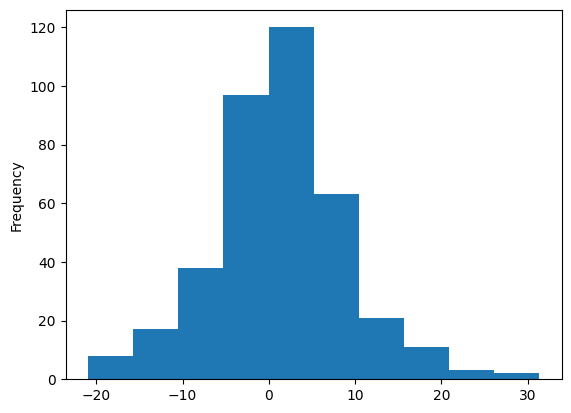

In [154]:
(100*(football_data_odds['PSCH']-football_data_odds['PSH'])/football_data_odds['PSH']).plot.hist()


--- Performance Metrics on Test Set ---
brier_score_loss: 0.20238911782274666
log_loss: 0.20238911782274666
Accuracy: 0.6553

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.78      0.59      0.67       225
     Class 1       0.56      0.75      0.64       155

    accuracy                           0.66       380
   macro avg       0.67      0.67      0.65       380
weighted avg       0.69      0.66      0.66       380



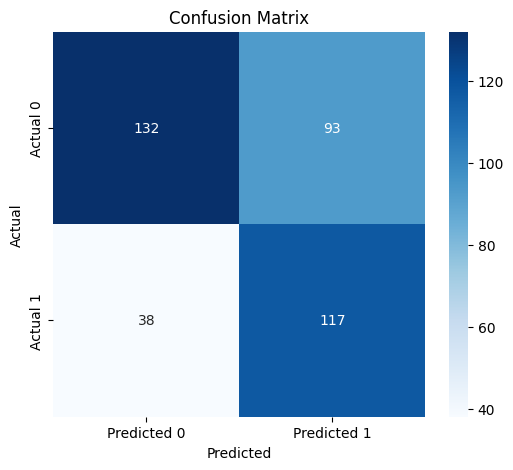

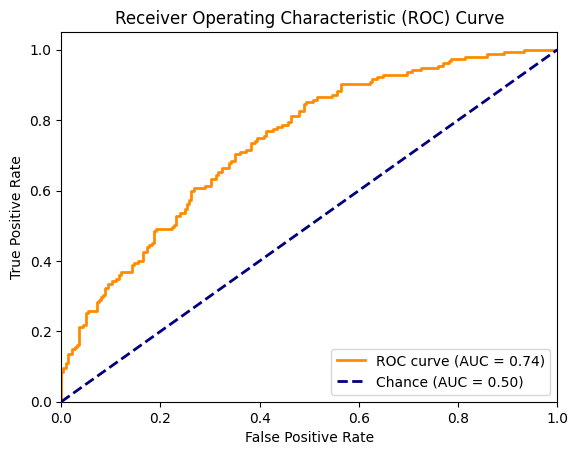


--- Assessing Model Calibration ---


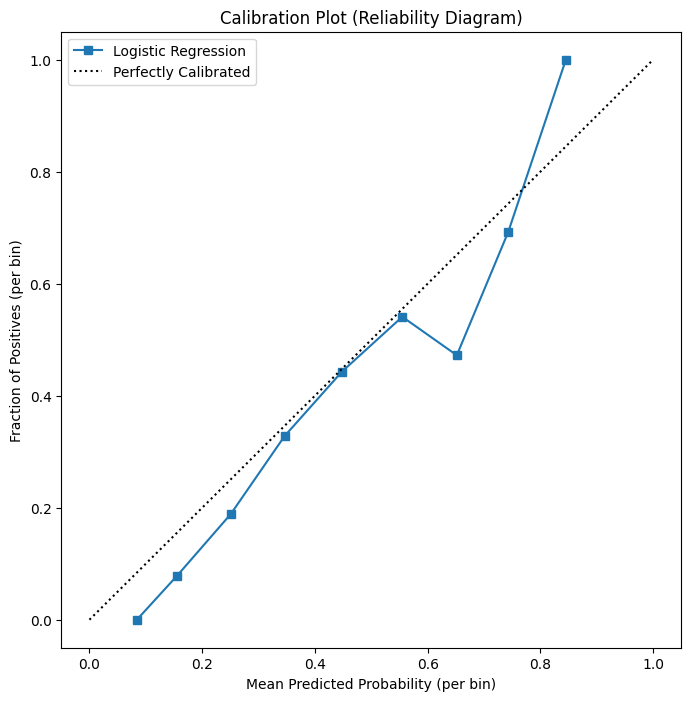

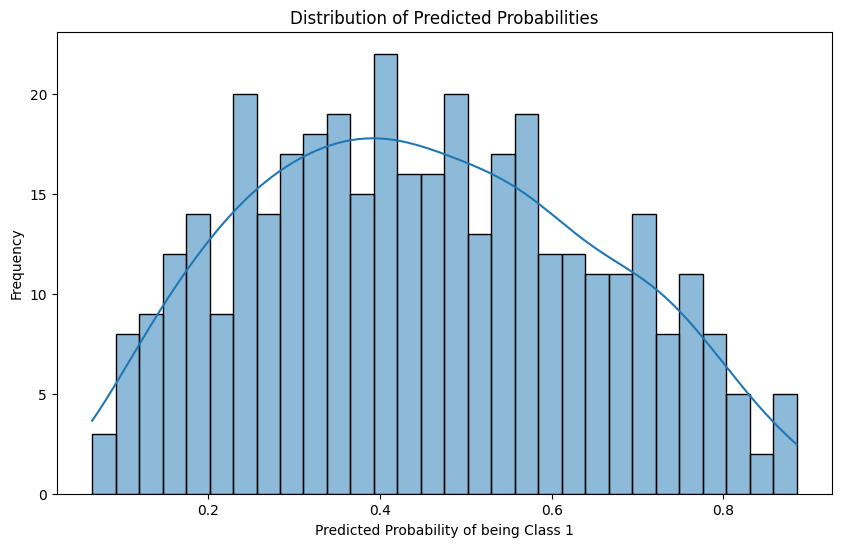

In [159]:
evaluate_model(y_true=football_data_odds['home_win'],y_pred_proba=football_data_odds['PSCH_stripped_prob'])


--- Performance Metrics on Test Set ---
Accuracy: 0.6605

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.77      0.60      0.68       225
     Class 1       0.56      0.74      0.64       155

    accuracy                           0.66       380
   macro avg       0.67      0.67      0.66       380
weighted avg       0.69      0.66      0.66       380



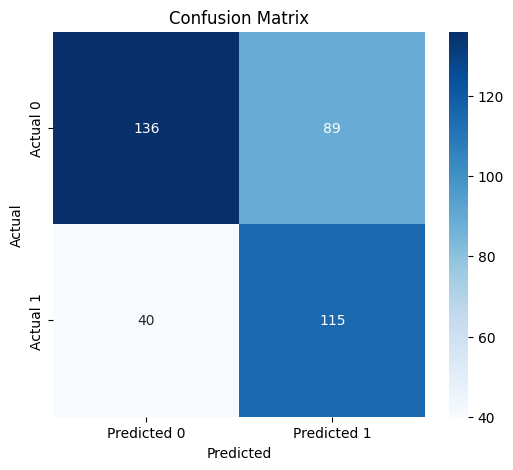

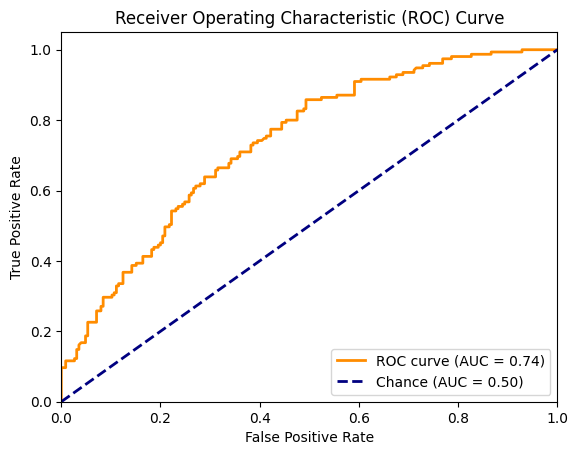


--- Assessing Model Calibration ---


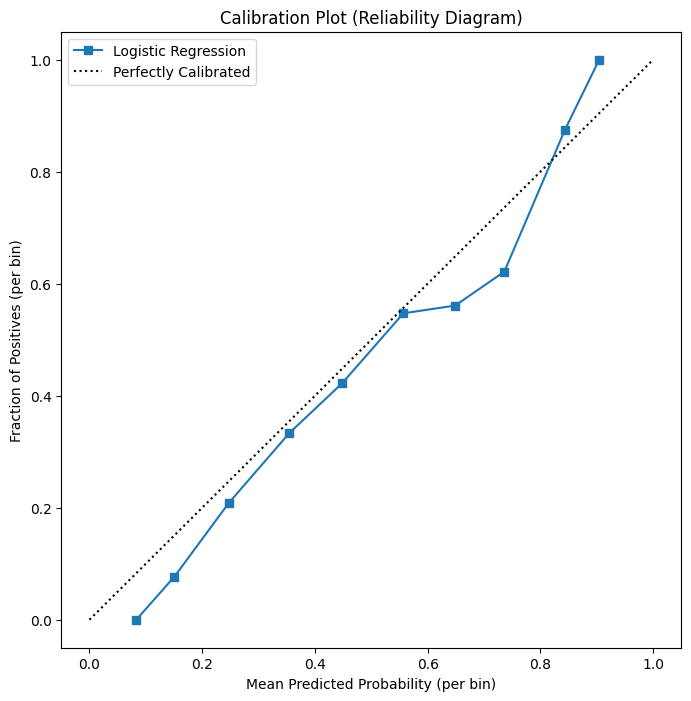

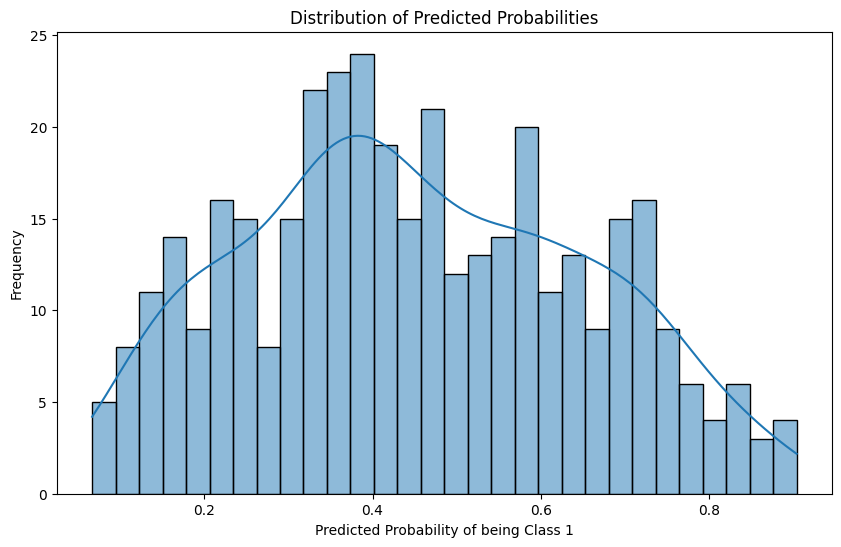

In [152]:
evaluate_model(y_true=football_data_odds['home_win'],y_pred_proba=football_data_odds['BFEH_stripped_prob'])


--- Performance Metrics on Test Set ---
Accuracy: 0.6553

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.77      0.59      0.67       225
     Class 1       0.56      0.75      0.64       155

    accuracy                           0.66       380
   macro avg       0.67      0.67      0.65       380
weighted avg       0.69      0.66      0.66       380



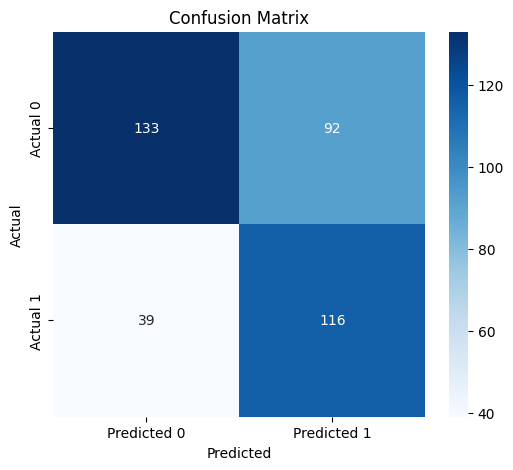

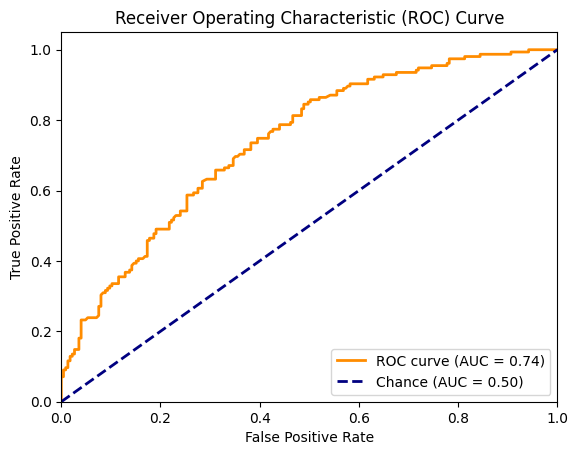


--- Assessing Model Calibration ---


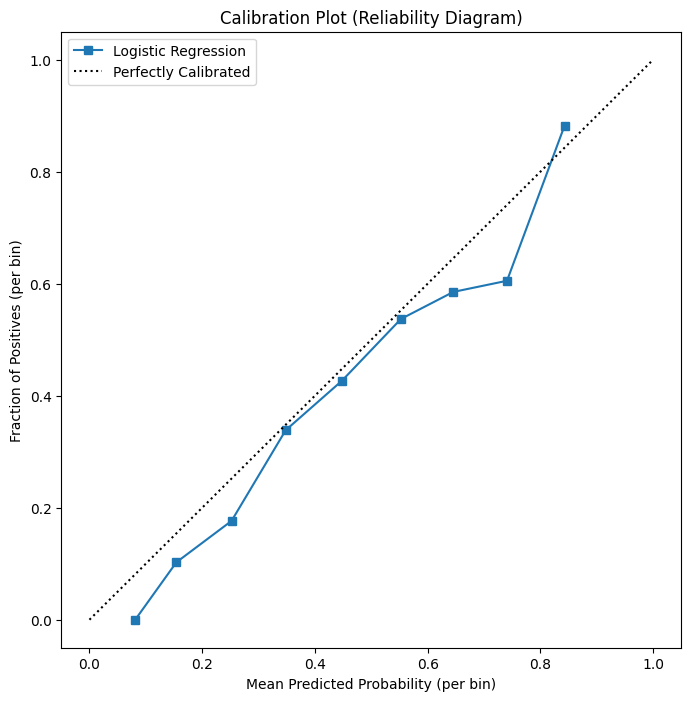

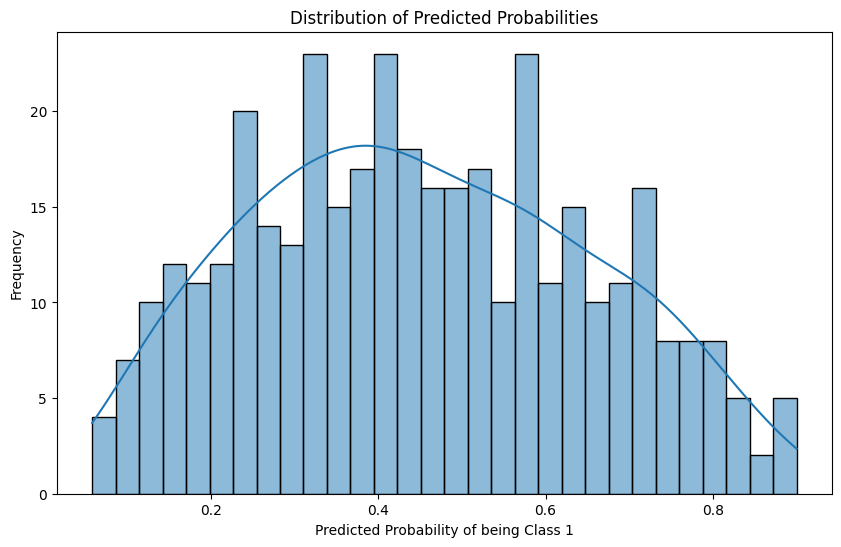

In [150]:
evaluate_model(y_true=football_data_odds['home_win'],y_pred_proba=football_data_odds['BFECH_stripped_prob'])


--- Performance Metrics on Test Set ---
Accuracy: 0.6553

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.78      0.59      0.67       225
     Class 1       0.56      0.75      0.64       155

    accuracy                           0.66       380
   macro avg       0.67      0.67      0.65       380
weighted avg       0.69      0.66      0.66       380



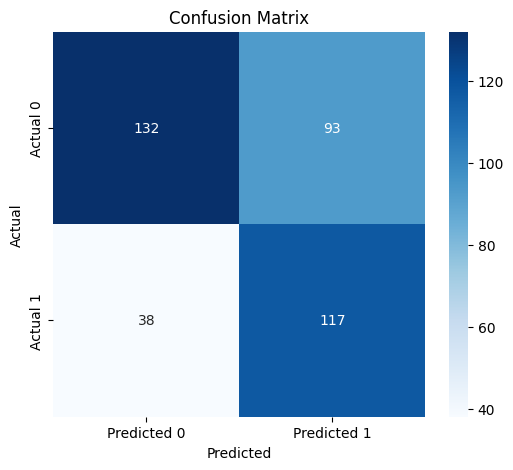

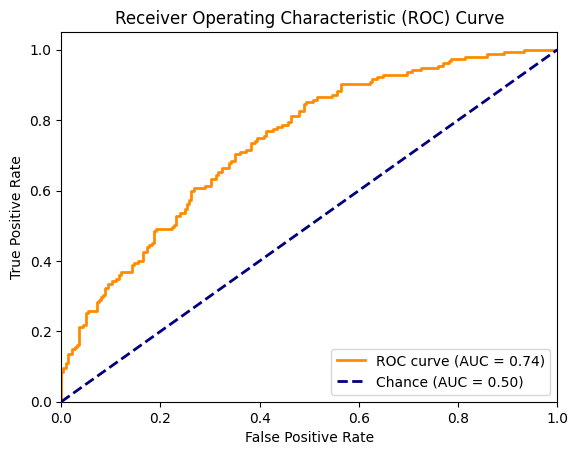


--- Assessing Model Calibration ---


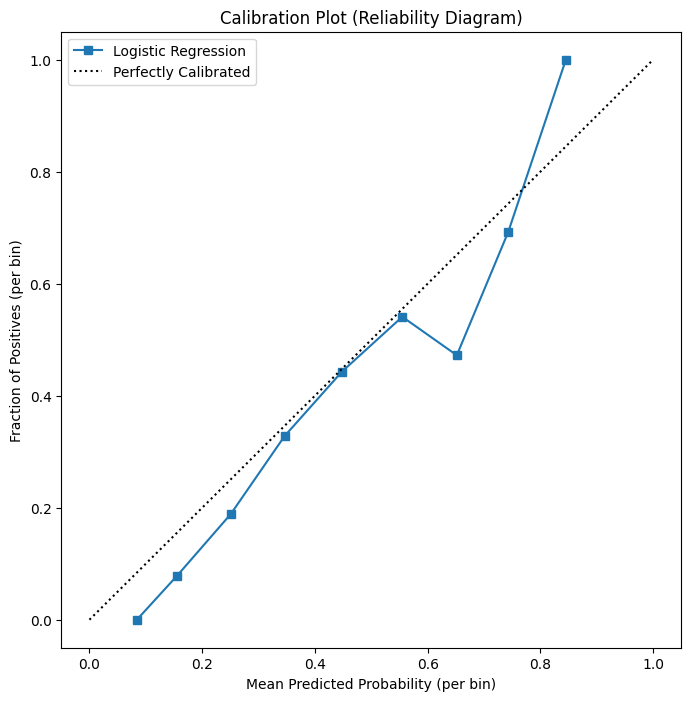

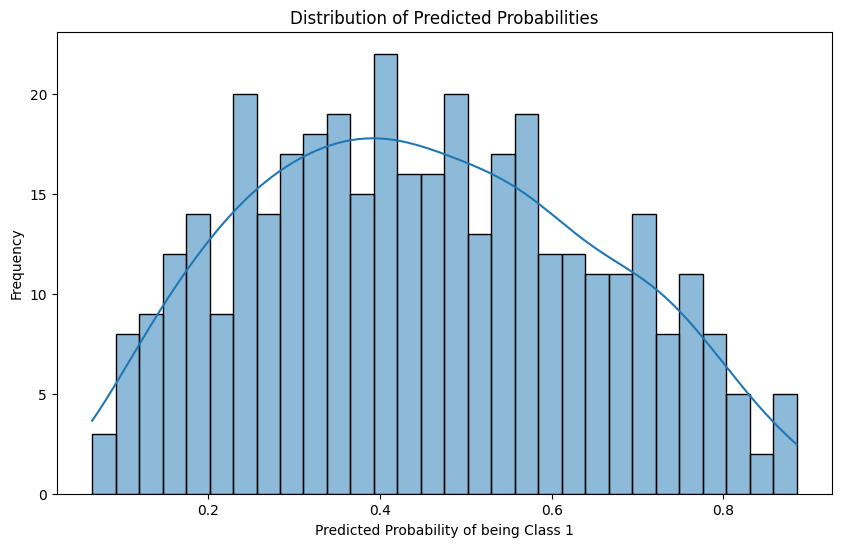

In [151]:
evaluate_model(y_true=football_data_odds['home_win'],y_pred_proba=football_data_odds['PSCH_stripped_prob'])